In [7]:
import pandas as pd
import numpy as np
from threading import Thread, Event
import time
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.stats import norm
from mpl_toolkits import mplot3d
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import ParameterGrid
from sklearn import metrics
from joblib import dump, load
from sklearn.ensemble import RandomForestRegressor

In [76]:
box_scores_attendance = pd.read_csv('league_boxscores_extra2.csv', index_col=0).reset_index(drop=True)

In [77]:
box_scores_attendance

,HOME_TEAM_NAME,AWAY_TEAM_NAME,GAME_ID,SEASON_ID,DATE,HOME_TEAM_GAME_NUMBER,HOME_LAST_GAME_DAYS,HOME_HOME_STREAK,HOME_AWAY_STREAK,HOME_WL,...,AWAY_FTA,AWAY_OREB,AWAY_DREB,AWAY_REB,AWAY_AST,AWAY_STL,AWAY_BLK,AWAY_TOV,AWAY_PF,ATTENDANCE
0,Philadelphia 76ers,Washington Bullets,28300003,21983,1983-10-28,1,0,1,0,W,...,29,10.0,26.0,36,32,9.0,3,21,35,16167.0
1,Denver Nuggets,Utah Jazz,28300009,21983,1983-10-28,1,0,1,0,W,...,32,10.0,27.0,37,32,6.0,8,7,30,10439.0
2,Portland Trail Blazers,San Diego Clippers,28300007,21983,1983-10-28,1,0,1,0,W,...,32,7.0,24.0,31,19,5.0,5,18,31,12666.0
3,Detroit Pistons,Boston Celtics,28300006,21983,1983-10-28,1,0,1,0,W,...,44,12.0,35.0,47,23,9.0,6,22,38,17117.0
4,Cleveland Cavaliers,New York Knicks,28300008,21983,1983-10-28,1,0,1,0,L,...,35,16.0,19.0,35,26,9.0,3,17,33,6082.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42404,Sacramento Kings,Chicago Bulls,22200350,22022,2022-12-04 00:00:00,22,1,1,0,W,...,19,7.0,32.0,39,17,9.0,5,16,16,17611.0
42405,Portland Trail Blazers,Indiana Pacers,22200351,22022,2022-12-04 00:00:00,24,1,1,0,W,...,12,12.0,32.0,44,22,10.0,5,15,22,17479.0
42406,New York Knicks,Cleveland Cavaliers,22200348,22022,2022-12-04 00:00:00,24,1,3,0,W,...,20,8.0,31.0,39,17,7.0,6,17,15,19007.0
42407,Detroit Pistons,Memphis Grizzlies,22200347,22022,2022-12-04 00:00:00,25,3,4,0,L,...,29,12.0,34.0,46,28,9.0,5,13,21,20088.0


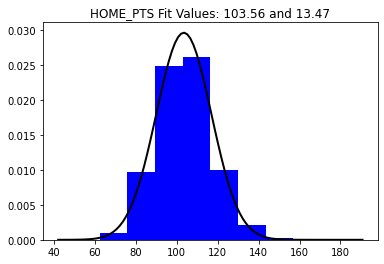

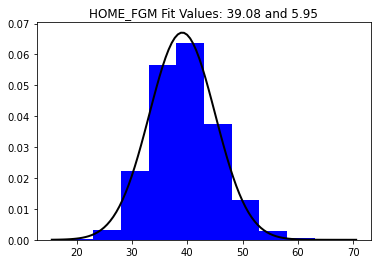

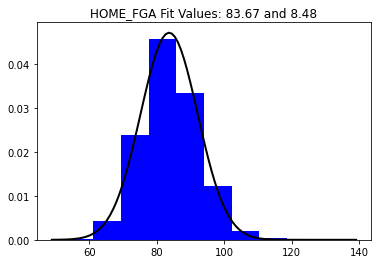

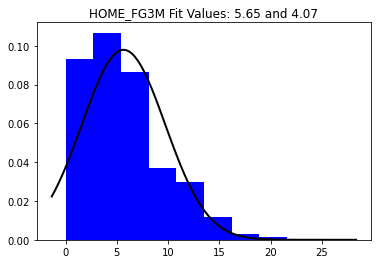

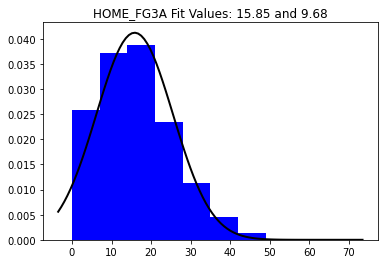

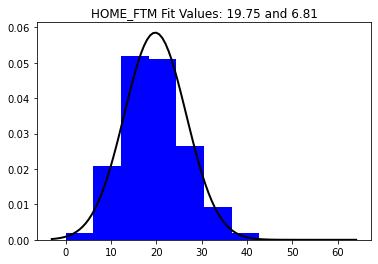

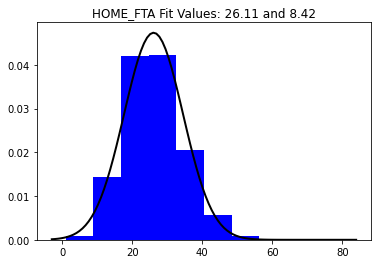

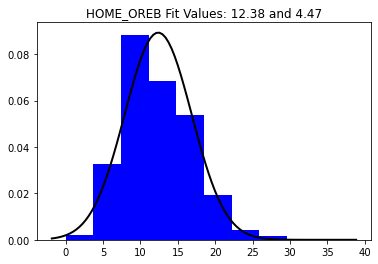

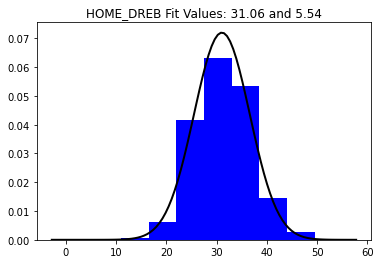

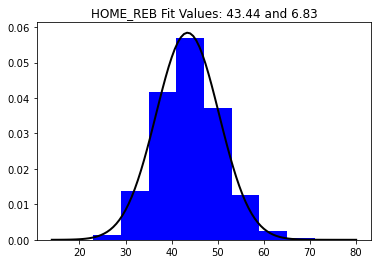

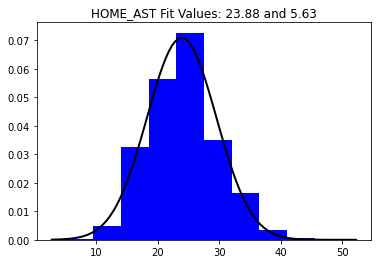

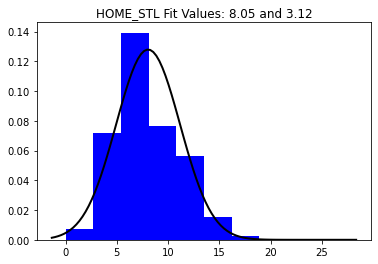

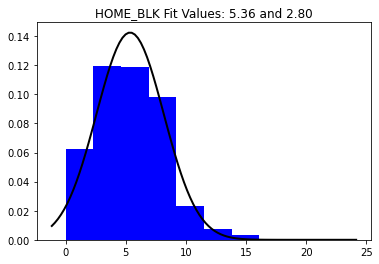

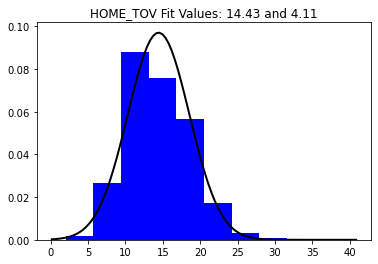

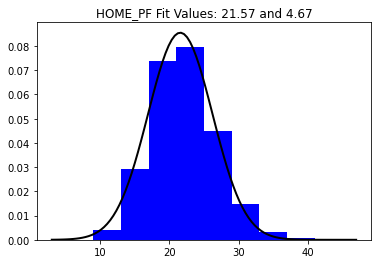

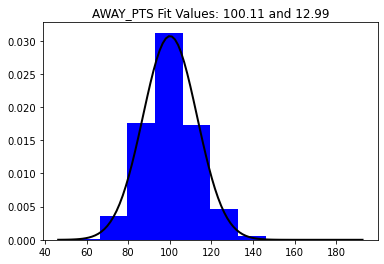

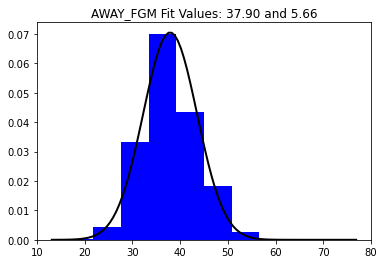

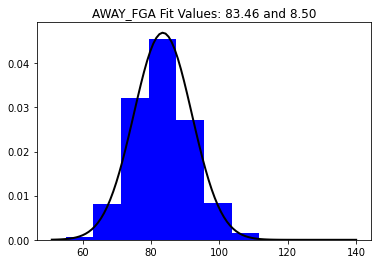

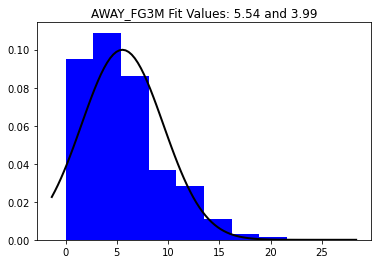

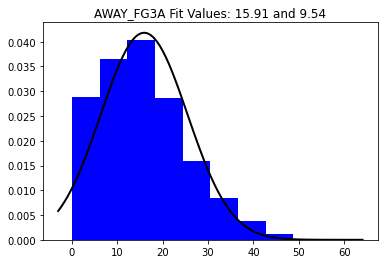

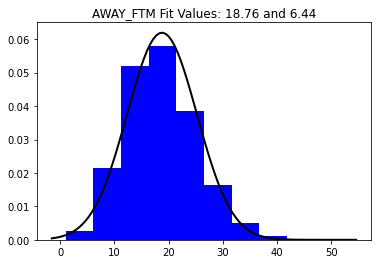

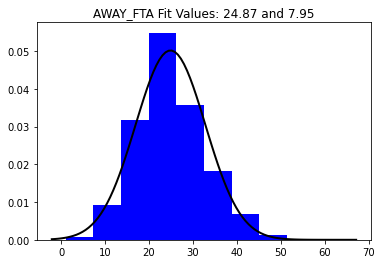

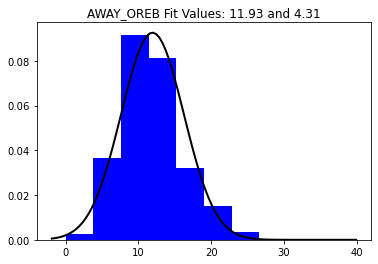

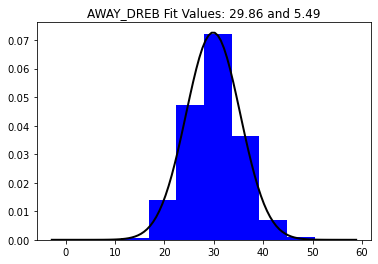

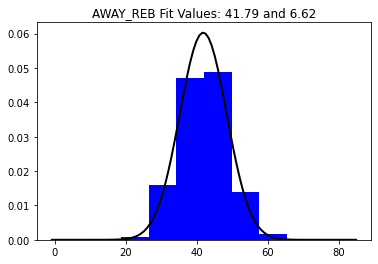

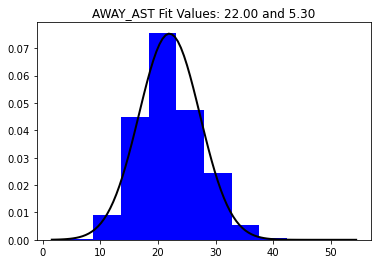

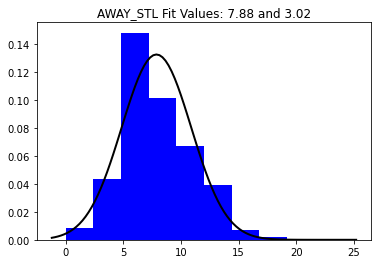

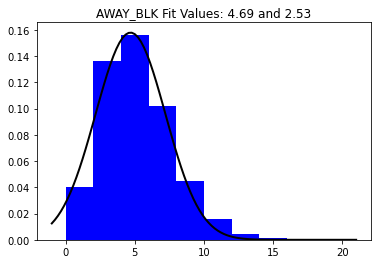

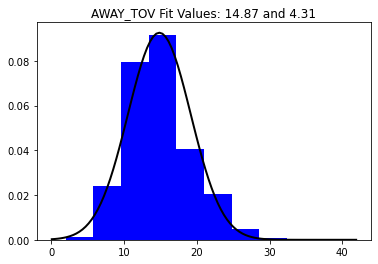

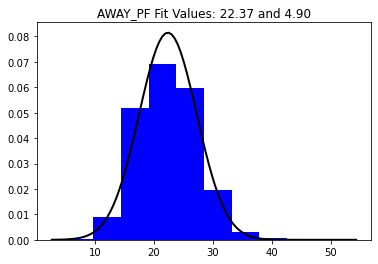

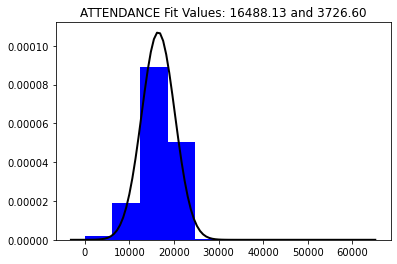

In [10]:
# Distrubution of Stats

columns = ['HOME_PTS','HOME_FGM', 'HOME_FGA', 'HOME_FG3M', 'HOME_FG3A', 'HOME_FTM', 'HOME_FTA', 'HOME_OREB',
       'HOME_DREB', 'HOME_REB', 'HOME_AST', 'HOME_STL', 'HOME_BLK', 'HOME_TOV','HOME_PF', 'AWAY_PTS',
        'AWAY_FGM', 'AWAY_FGA', 'AWAY_FG3M', 'AWAY_FG3A', 'AWAY_FTM', 'AWAY_FTA', 'AWAY_OREB',
       'AWAY_DREB', 'AWAY_REB', 'AWAY_AST', 'AWAY_STL', 'AWAY_BLK', 'AWAY_TOV','AWAY_PF', 'ATTENDANCE']

for column in columns:
    data = box_scores_attendance[column].dropna()
    mu, std = norm.fit(data)
    plt.hist(data, density=True, color='b')
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)

    plt.plot(x, p, 'k', linewidth=2)
    title = f"{column} Fit Values: {mu:.2f} and {std:.2f}"
    plt.title(title)
    plt.savefig(f"nba_plots/{column}_hist.png")
    plt.show()

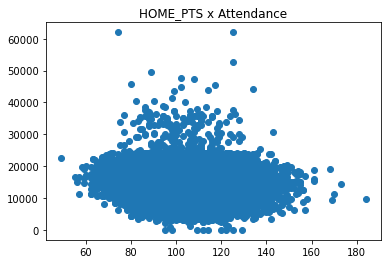

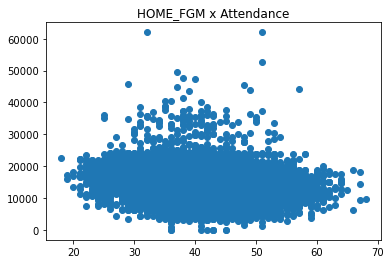

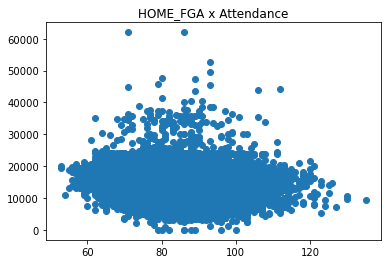

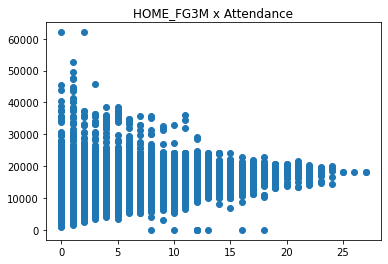

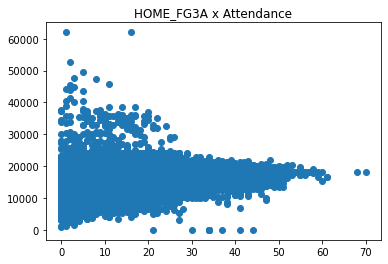

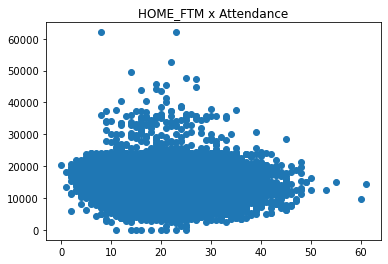

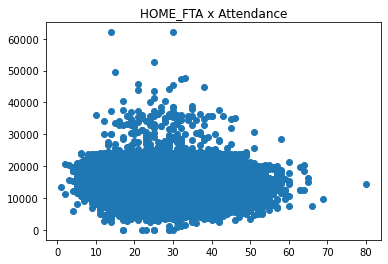

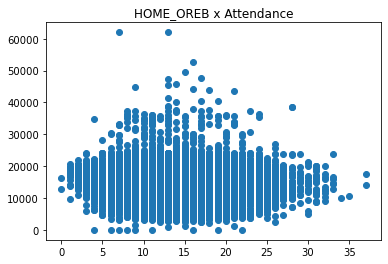

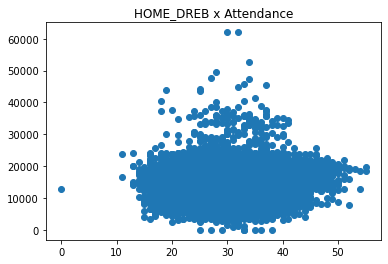

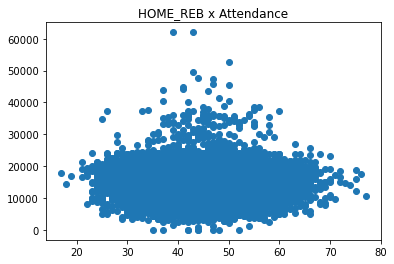

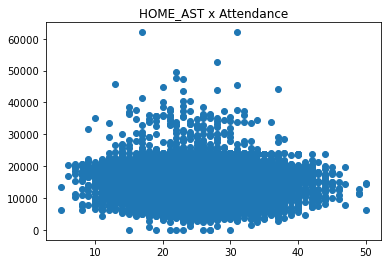

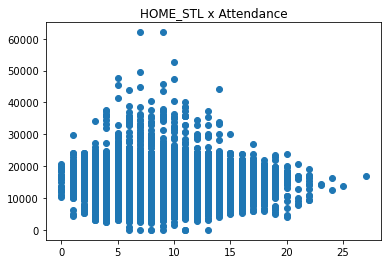

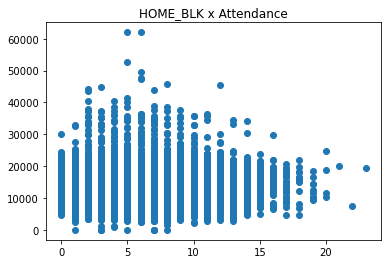

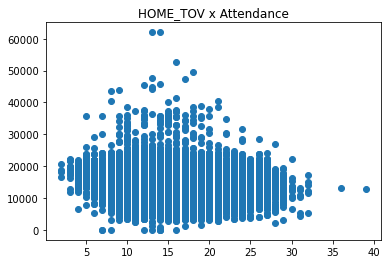

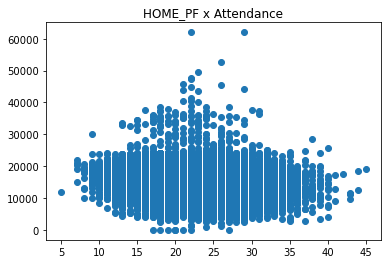

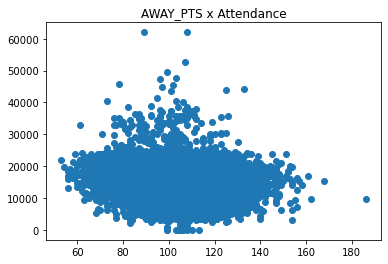

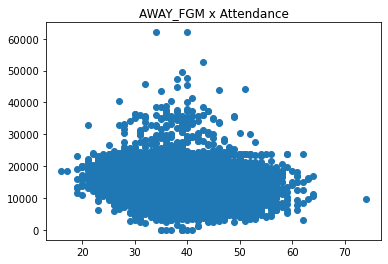

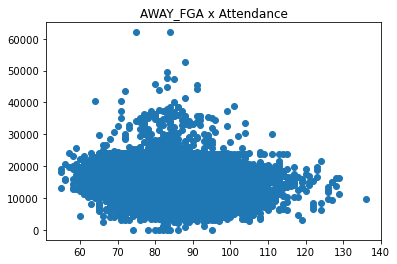

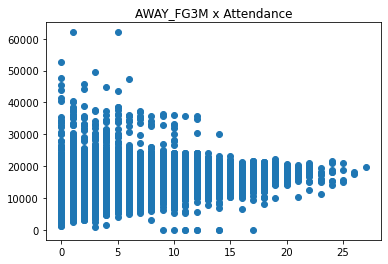

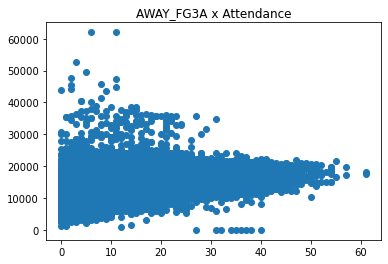

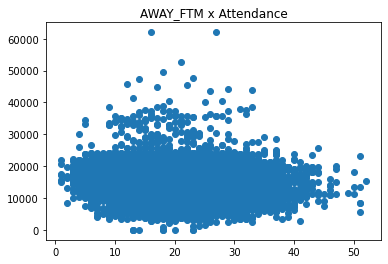

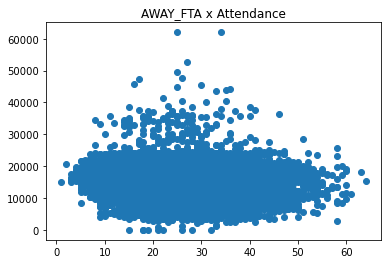

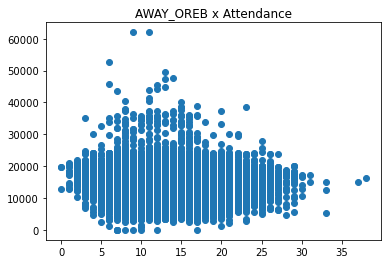

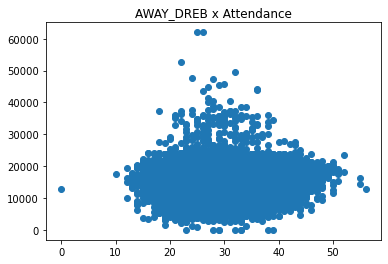

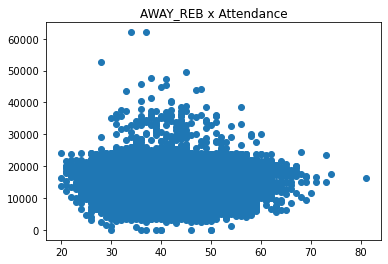

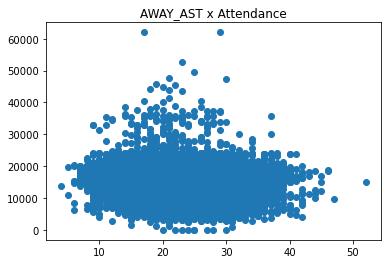

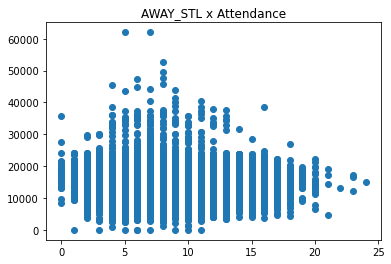

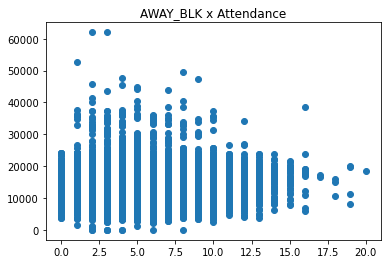

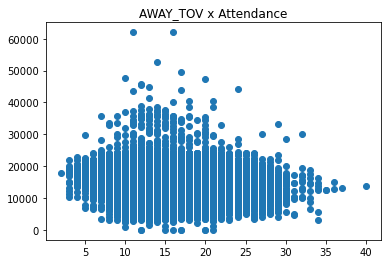

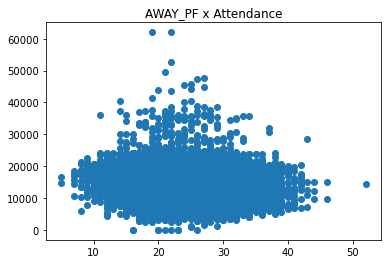

In [12]:
#STats Scatter Plots
columns = ['HOME_PTS','HOME_FGM', 'HOME_FGA', 'HOME_FG3M', 'HOME_FG3A', 'HOME_FTM', 'HOME_FTA', 'HOME_OREB',
       'HOME_DREB', 'HOME_REB', 'HOME_AST', 'HOME_STL', 'HOME_BLK', 'HOME_TOV','HOME_PF', 'AWAY_PTS',
        'AWAY_FGM', 'AWAY_FGA', 'AWAY_FG3M', 'AWAY_FG3A', 'AWAY_FTM', 'AWAY_FTA', 'AWAY_OREB',
       'AWAY_DREB', 'AWAY_REB', 'AWAY_AST', 'AWAY_STL', 'AWAY_BLK', 'AWAY_TOV','AWAY_PF']

for column in columns:
    data = box_scores_attendance.dropna()[column]
    attendance = box_scores_attendance.dropna()['ATTENDANCE']
    plt.scatter(data, attendance)
    title = f"{column} x Attendance"
    plt.title(title)
    plt.savefig(f"nba_plots/{column}_scatterXattendance.png")
    plt.show()

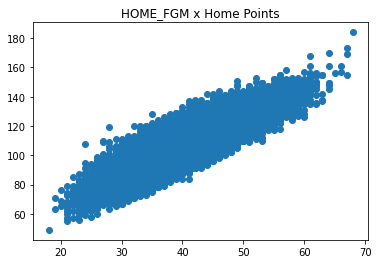

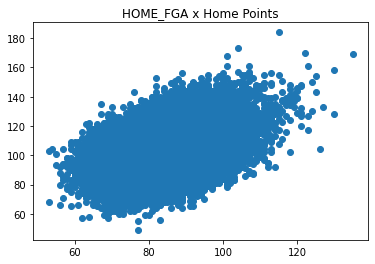

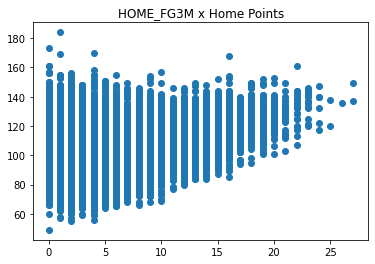

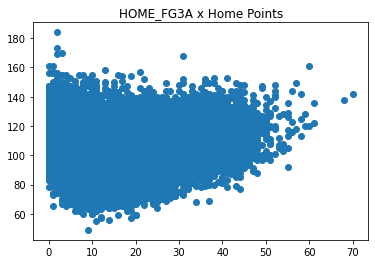

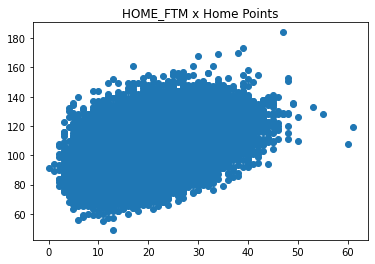

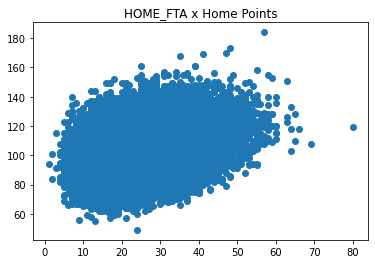

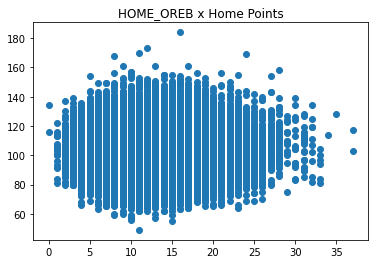

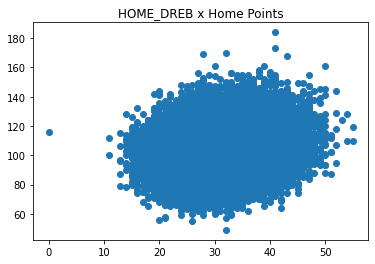

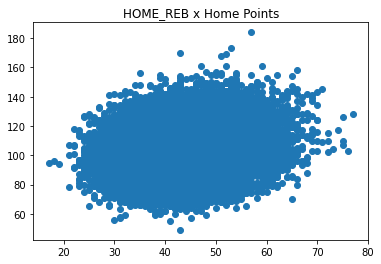

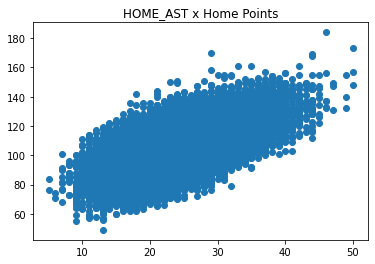

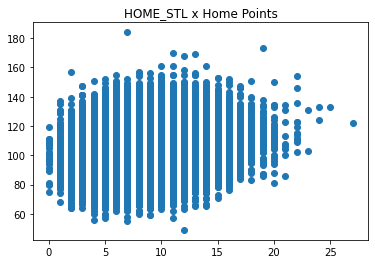

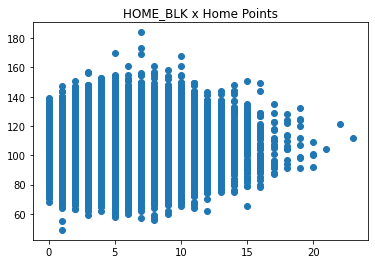

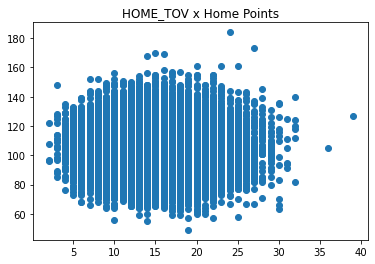

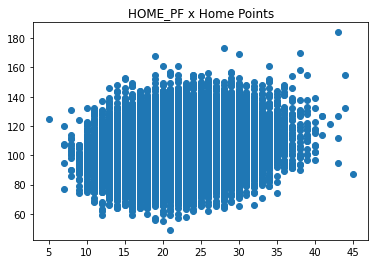

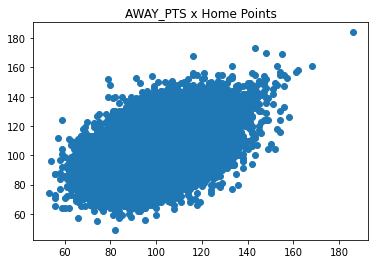

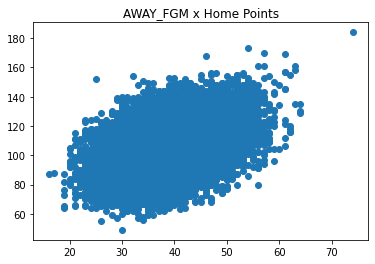

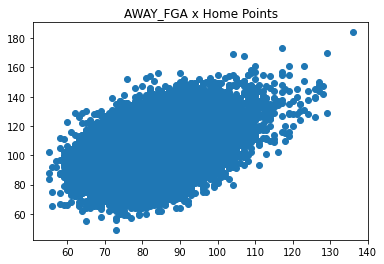

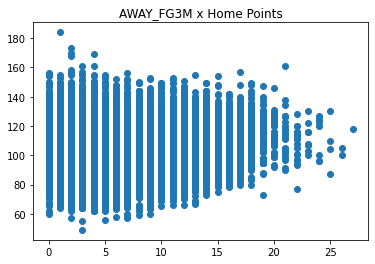

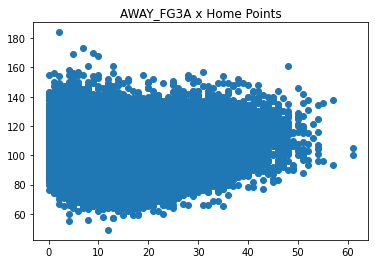

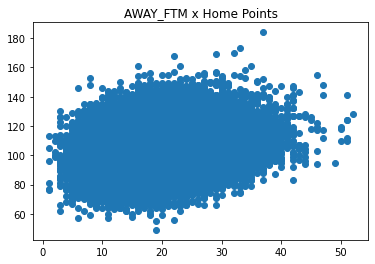

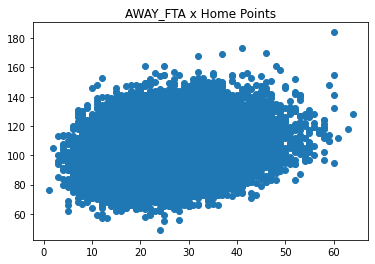

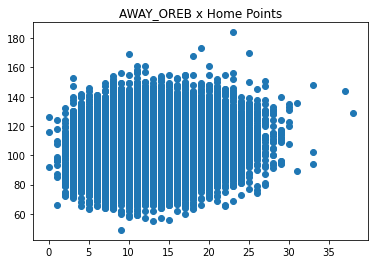

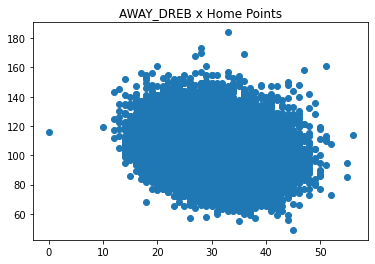

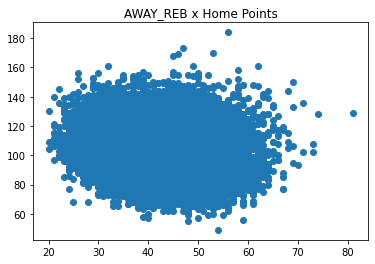

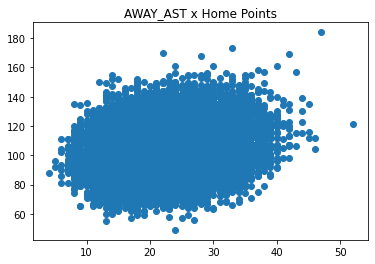

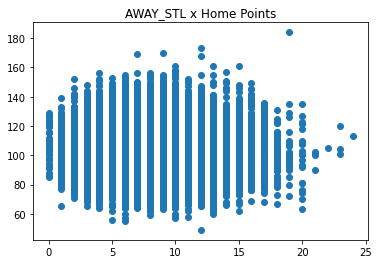

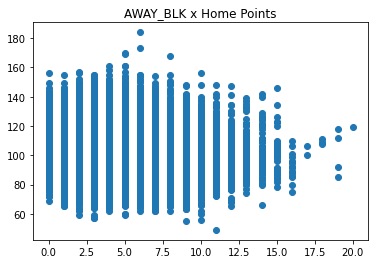

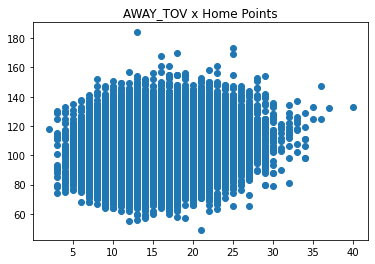

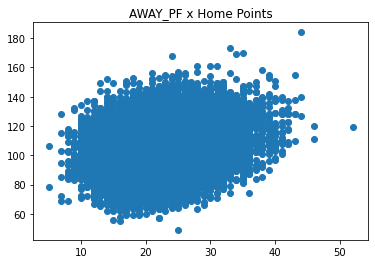

In [14]:
columns = ['HOME_FGM', 'HOME_FGA', 'HOME_FG3M', 'HOME_FG3A', 'HOME_FTM', 'HOME_FTA', 'HOME_OREB',
       'HOME_DREB', 'HOME_REB', 'HOME_AST', 'HOME_STL', 'HOME_BLK', 'HOME_TOV','HOME_PF', 'AWAY_PTS',
        'AWAY_FGM', 'AWAY_FGA', 'AWAY_FG3M', 'AWAY_FG3A', 'AWAY_FTM', 'AWAY_FTA', 'AWAY_OREB',
       'AWAY_DREB', 'AWAY_REB', 'AWAY_AST', 'AWAY_STL', 'AWAY_BLK', 'AWAY_TOV','AWAY_PF']

for column in columns:
    data = box_scores_attendance.dropna()[column]
    pts = box_scores_attendance.dropna()['HOME_PTS']
    plt.scatter(data, pts)
    title = f"{column} x Home Points"
    plt.title(title)
    plt.savefig(f"nba_plots/{column}_scatterXhomepts.png")
    plt.show()

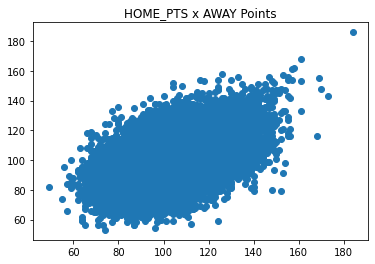

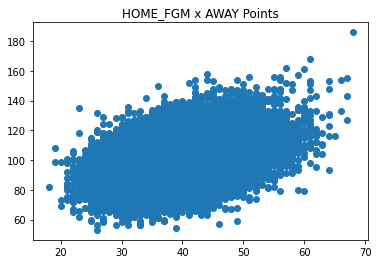

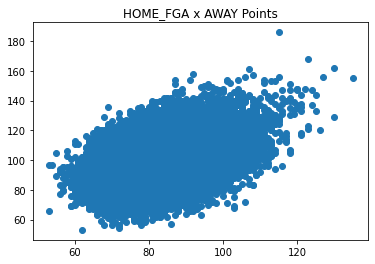

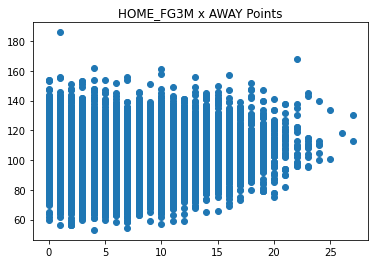

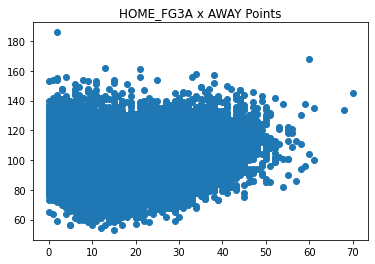

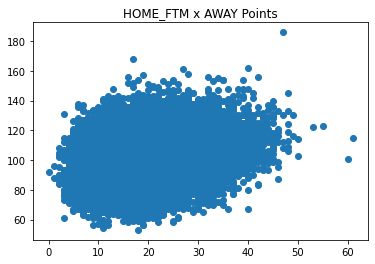

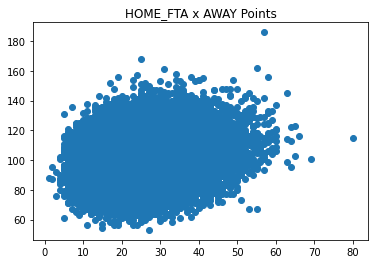

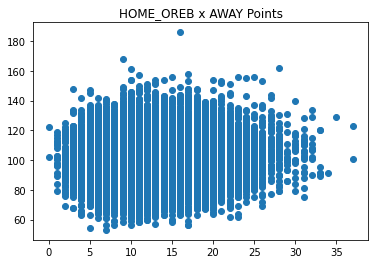

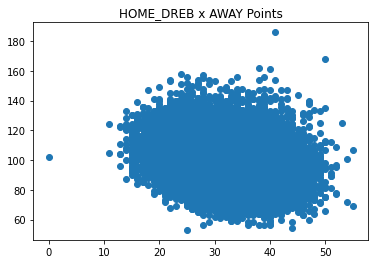

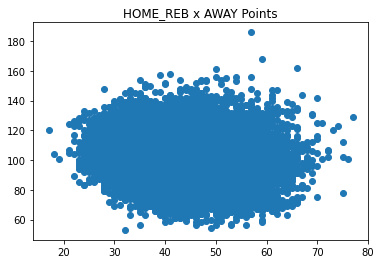

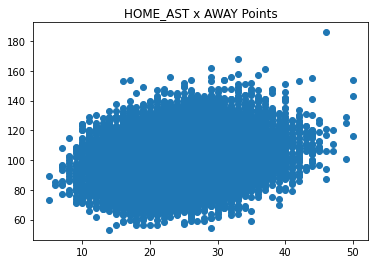

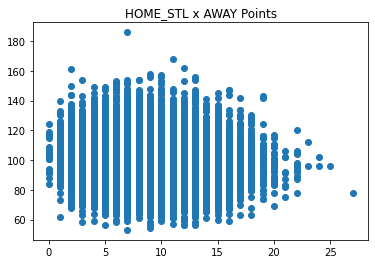

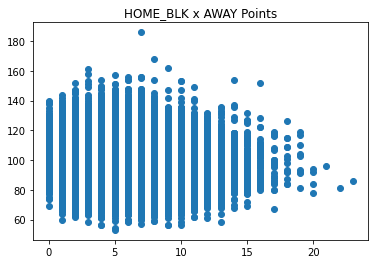

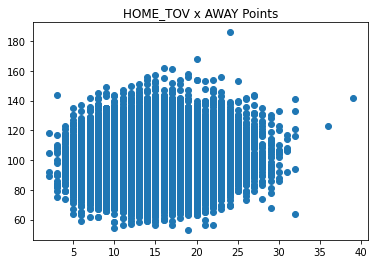

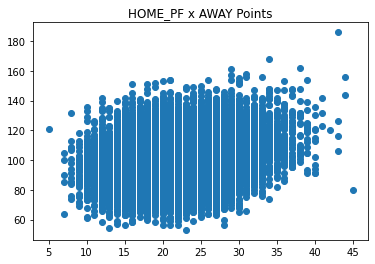

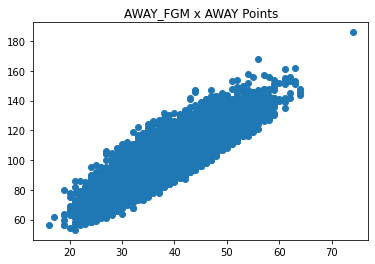

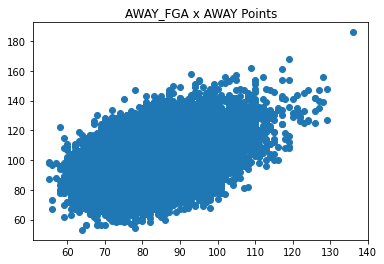

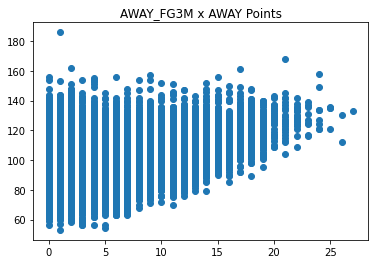

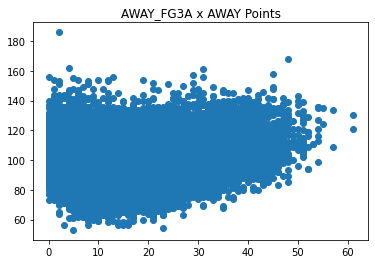

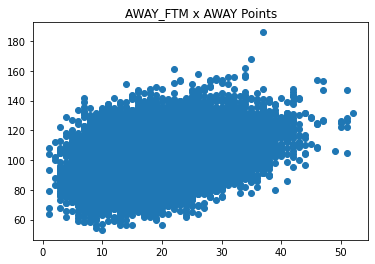

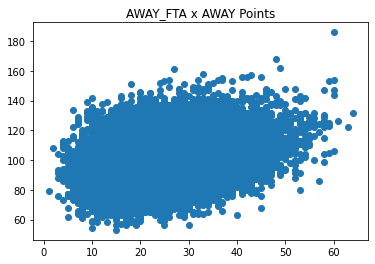

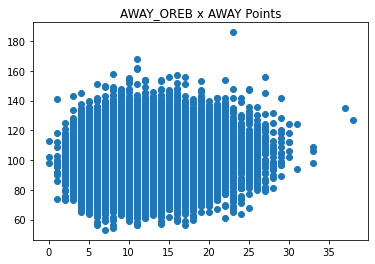

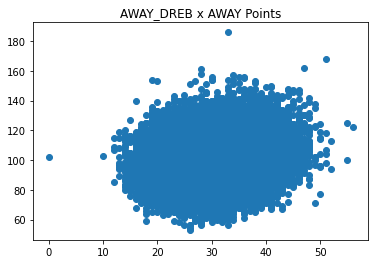

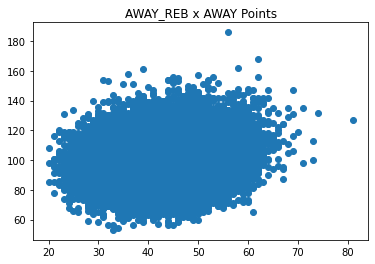

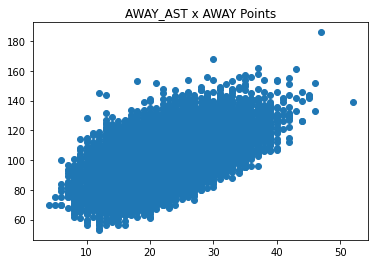

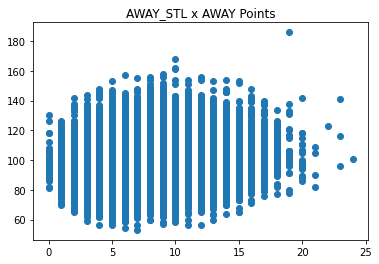

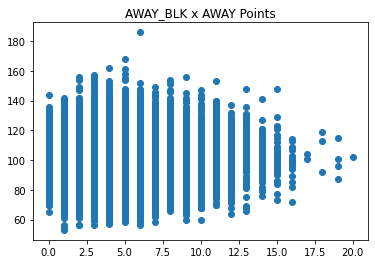

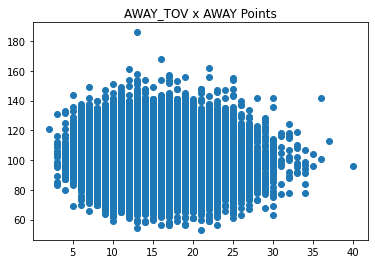

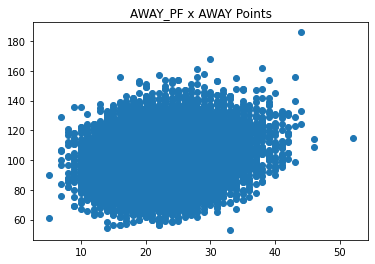

In [78]:
columns = ['HOME_PTS','HOME_FGM', 'HOME_FGA', 'HOME_FG3M', 'HOME_FG3A', 'HOME_FTM', 'HOME_FTA', 'HOME_OREB',
       'HOME_DREB', 'HOME_REB', 'HOME_AST', 'HOME_STL', 'HOME_BLK', 'HOME_TOV','HOME_PF',
        'AWAY_FGM', 'AWAY_FGA', 'AWAY_FG3M', 'AWAY_FG3A', 'AWAY_FTM', 'AWAY_FTA', 'AWAY_OREB',
       'AWAY_DREB', 'AWAY_REB', 'AWAY_AST', 'AWAY_STL', 'AWAY_BLK', 'AWAY_TOV','AWAY_PF']

for column in columns:
    data = box_scores_attendance.dropna()[column]
    pts = box_scores_attendance.dropna()['AWAY_PTS']
    plt.scatter(data, pts)
    title = f"{column} x AWAY Points"
    plt.title(title)
    plt.savefig(f"nba_plots/{column}_scatterXawaypts.png")
    plt.show()

In [11]:
box_scores = box_scores_attendance.dropna().drop(columns=['HOME_TEAM_NAME','HOME_TEAM_GAME_NUMBER', 'AWAY_TEAM_NAME', 'GAME_ID', 'SEASON_ID', 'DATE', 'HOME_WL', 'AWAY_WL', 'HOME_AWAY_STREAK', 'AWAY_HOME_STREAK','ATTENDANCE'])
.reset_index(drop=True)
box_scores_scaled = box_scores.copy()

In [15]:
from sklearn.preprocessing import StandardScaler

box_scores_scaled[box_scores_scaled.columns] = StandardScaler().fit_transform(box_scores_scaled)
print(box_scores_scaled.describe())

       HOME_LAST_GAME_DAYS  HOME_HOME_STREAK      HOME_PTS      HOME_FGM  \
count         4.181900e+04      4.181900e+04  4.181900e+04  4.181900e+04   
mean         -6.022460e-16      5.414129e-15 -1.304498e-15 -1.466167e-15   
std           1.000012e+00      1.000012e+00  1.000012e+00  1.000012e+00   
min          -2.218416e+00     -7.556406e-01 -4.045407e+00 -3.539475e+00   
25%          -1.854372e-01     -7.556406e-01 -7.030605e-01 -6.809886e-01   
50%          -1.854372e-01     -7.556406e-01 -3.459116e-02 -8.403494e-03   
75%           8.310521e-01      1.238021e-01  6.338782e-01  6.641816e-01   
max           8.962966e+00      6.279901e+00  5.981633e+00  4.867838e+00   

           HOME_FGA     HOME_FG3M     HOME_FG3A      HOME_FTM      HOME_FTA  \
count  4.181900e+04  4.181900e+04  4.181900e+04  4.181900e+04  4.181900e+04   
mean  -3.160054e-15  5.683836e-14  4.808142e-14 -2.224864e-15 -2.241044e-14   
std    1.000012e+00  1.000012e+00  1.000012e+00  1.000012e+00  1.000012e+00   

In [16]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(box_scores_scaled)
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

print(f"Cumulative variance explained by {pca.n_components_} principal components: {np.sum(pca.explained_variance_ratio_):.2%}")

Explained variation per principal component: [0.14778409 0.11903506 0.07664224]
Cumulative variance explained by 3 principal components: 34.35%


In [19]:
dataset_pca = pd.DataFrame(abs(pca.components_), columns=box_scores_scaled.columns)
for i, data in dataset_pca.iterrows():
    print(dataset_pca.sort_values(by = i, axis = 1, ascending=False))

   HOME_FTA   AWAY_PF  HOME_FTM  HOME_FG3A   HOME_PF  AWAY_FTA  AWAY_FG3A  \
0  0.272560  0.271683  0.265197   0.254951  0.251527  0.251308   0.250912   
1  0.071008  0.096484  0.058491   0.224199  0.097529  0.072853   0.226069   
2  0.136775  0.132585  0.154962   0.169752  0.169364  0.185507   0.164001   

   AWAY_FTM  HOME_PTS  HOME_FG3M  ...  HOME_BLK  HOME_DREB  HOME_REB  \
0  0.240514  0.232953   0.223409  ...  0.068930   0.060564  0.057833   
1  0.060977  0.298285   0.228222  ...  0.014539   0.150505  0.131577   
2  0.214246  0.105528   0.189324  ...  0.242104   0.290864  0.394514   

   AWAY_BLK  AWAY_TEAM_GAME_NUMBER  AWAY_REB  HOME_HOME_STREAK  \
0  0.030918               0.017099  0.015756          0.009229   
1  0.021441               0.051917  0.138051          0.024870   
2  0.142611               0.029495  0.183289          0.006678   

   HOME_LAST_GAME_DAYS  AWAY_LAST_GAME_DAYS  AWAY_AWAY_STREAK  
0             0.007591             0.002717          0.001197  
1        

Parameter: {'n_clusters': 2} Score 0.2766165434394437
Parameter: {'n_clusters': 3} Score 0.2745162051025236
Parameter: {'n_clusters': 4} Score 0.25125517566221295
Parameter: {'n_clusters': 5} Score 0.24343749309913293
Parameter: {'n_clusters': 6} Score 0.23436003713176398


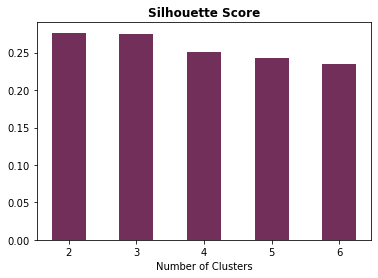

In [14]:
# Clusters

parameters = [2, 3, 4, 5, 6]

# instantiating ParameterGrid, pass number of clusters as input
parameter_grid = ParameterGrid({'n_clusters': parameters})
best_score = -1
kmeans_model = KMeans()     # instantiating KMeans model
silhouette_scores = []
# evaluation based on silhouette_score
for p in parameter_grid:
    kmeans_model.set_params(**p)    # set current hyper parameter
    kmeans_model.fit(pca_result)          # fit model on wine dataset, this will find clusters based on parameter p
    ss = metrics.silhouette_score(pca_result, kmeans_model.labels_)   # calculate silhouette_score
    silhouette_scores += [ss]       # store all the scores
    print('Parameter:', p, 'Score', ss)
    # check p which has the best score
    if ss > best_score:
        best_score = ss
        best_grid = p
# plotting silhouette score
plt.bar(range(len(silhouette_scores)), list(silhouette_scores), align='center', color='#722f59', width=0.5)
plt.xticks(range(len(silhouette_scores)), list(parameters))
plt.title('Silhouette Score', fontweight='bold')
plt.xlabel('Number of Clusters')
plt.savefig(f"nba_plots/silhouette_score.png")
plt.show()

In [21]:
kmeans = KMeans(n_clusters=3)    
kmeans.fit(box_scores_scaled)

KMeans(n_clusters=3)

In [53]:
def visualizing_results(pca_result, label, centroids_pca, clusters):
    """ Visualizing the clusters
    :param pca_result: PCA applied data
    :param label: K Means labels
    :param centroids_pca: PCA format K Means centroids
    """
    # ------------------ Using Matplotlib for plotting-----------------------
    x = pca_result[:, 0]
    y = pca_result[:, 1]
    z = pca_result[:, 2]
    
    fig = plt.figure(figsize = (10, 7))
    ax = fig.add_subplot(1, 1, 1, projection ="3d")
    ax.view_init(90,0)
    ax.scatter3D(x, y, z, c=label, alpha=0.5, s=200)  # plot different colors per cluster
    plt.title(f"NBA Clusters {clusters}")
    ax.set_xlabel('PCA 1')
    ax.set_ylabel('PCA 2')
    ax.set_zlabel('PCA 3')

    ax.scatter3D(centroids_pca[:, 0], centroids_pca[:, 1], centroids_pca[:, 2], marker='X', s=200, linewidths=1.5,
                color='red', edgecolors="black", lw=1.5)
    #plt.savefig(f"nba_plots/nba_clusters_{clusters}.png")
    plt.show()


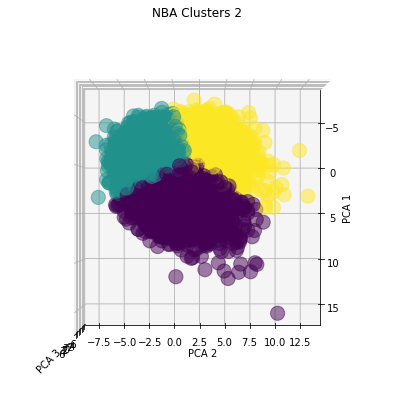

In [54]:
visualizing_results(pca_result, kmeans.labels_, kmeans.cluster_centers_, 3)

In [30]:
box_labels = box_scores_attendance.dropna().copy()
box_labels['CLUSTER'] = kmeans.labels_

In [39]:
box_labels['YEAR_COUNT'] = [int(date[0:4]) % 1982 for date in box_labels['DATE']]
clusterCount = box_labels[['YEAR_COUNT', 'CLUSTER']].groupby(['CLUSTER', 'YEAR_COUNT']).count()
cluster1 = box_labels[box_labels['CLUSTER'] == 0]
cluster2 = box_labels[box_labels['CLUSTER'] == 1]
cluster3 = box_labels[box_labels['CLUSTER'] == 2]
clusterArray = []
for year in range(1, 38):
    totalClusters = len(cluster1[cluster1['YEAR_COUNT'] == year]) + len(cluster2[cluster2['YEAR_COUNT'] == year]) + len(cluster3[cluster3['YEAR_COUNT'] == year]) 
    clusterArray.append([year + 1982, len(cluster1[cluster1['YEAR_COUNT'] == year])/totalClusters, len(cluster3[cluster3['YEAR_COUNT'] == year])/totalClusters, len(cluster2[cluster2['YEAR_COUNT'] == year])/totalClusters,])
clusterPd = pd.DataFrame(clusterArray, columns=['Year', 'Era 1', 'Era 2', 'Era 3'])

In [40]:
clusterPd

,Year,Era 1,Era 2,Era 3
0,1983,0.942197,0.057803,0.000000
1,1984,0.923404,0.074468,0.002128
2,1985,0.924548,0.073326,0.002125
3,1986,0.931943,0.065862,0.002195
4,1987,0.917492,0.080308,0.002200
5,1988,0.877155,0.117457,0.005388
6,1989,0.809859,0.174044,0.016097
7,1990,0.788669,0.201439,0.009892
8,1991,0.716846,0.275090,0.008065
9,1992,0.726679,0.246269,0.027052


In [70]:
columns = ['HOME_PTS', 'HOME_FGM', 'HOME_FGA',
       'HOME_FG3M', 'HOME_FG3A', 'HOME_FTM', 'HOME_FTA',
       'HOME_PF','AWAY_PTS',
       'AWAY_FGM', 'AWAY_FGA', 'AWAY_FG3M', 'AWAY_FG3A', 'AWAY_FTM',
       'AWAY_FTA', 'AWAY_PF', 'ATTENDANCE']
era1 = box_labels[columns][(box_labels['SEASON_ID'] % 20000 >= 1983) & (box_labels['SEASON_ID'] % 20000 < 1995)].mean().to_numpy()
era2 = box_labels[columns][(box_labels['SEASON_ID'] % 20000 >= 1995) & (box_labels['SEASON_ID'] % 20000 < 2014)].mean().to_numpy()
era3 = box_labels[columns][(box_labels['SEASON_ID'] % 20000 >= 2014)].mean().to_numpy()
erasDf = pd.DataFrame([era1, era2, era3], columns=columns)
erasDf.to_csv('nba-eras.csv')

In [81]:
erasDf

,HOME_PTS,HOME_FGM,HOME_FGA,HOME_FG3M,HOME_FG3A,HOME_FTM,HOME_FTA,HOME_PF,AWAY_PTS,AWAY_FGM,AWAY_FGA,AWAY_FG3M,AWAY_FG3A,AWAY_FTM,AWAY_FTA,AWAY_PF,ATTENDANCE
0,109.181870,42.311182,87.132581,2.270312,6.806441,22.289112,29.373631,23.094736,104.607896,40.782982,86.819356,2.282328,7.070950,20.759604,27.474906,24.282900,14421.060569
1,99.004261,37.005920,80.840913,5.921466,16.459141,19.070954,25.347147,21.304943,95.839612,35.901193,80.604996,5.810639,16.476588,18.226588,24.303463,21.984078,17213.189765
2,107.518590,39.828783,86.200439,10.273014,28.639182,17.588009,22.960488,19.829606,105.025518,39.014680,86.241323,9.996159,28.415832,17.000000,22.229524,20.355467,17743.169433


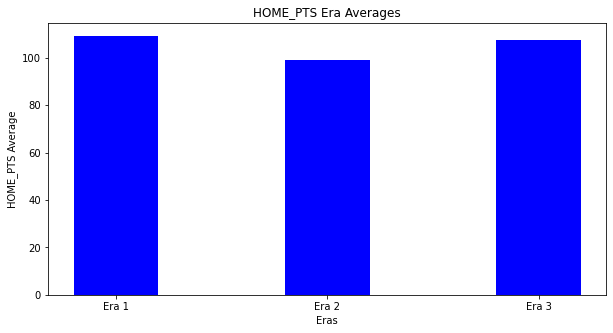

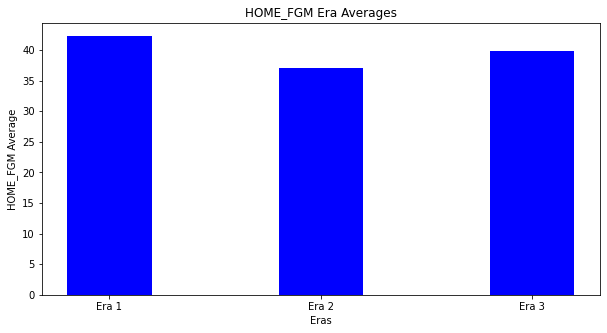

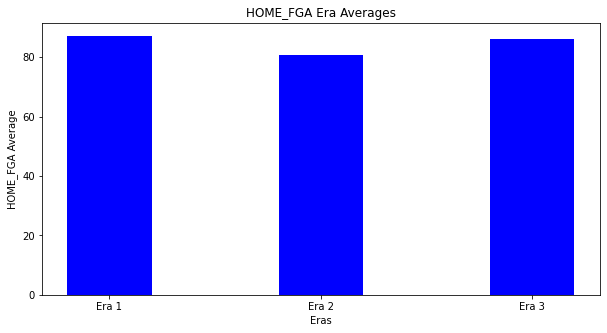

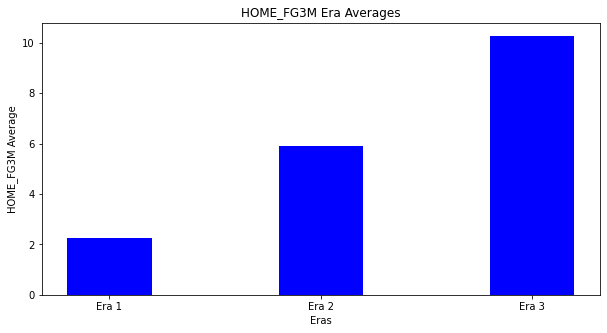

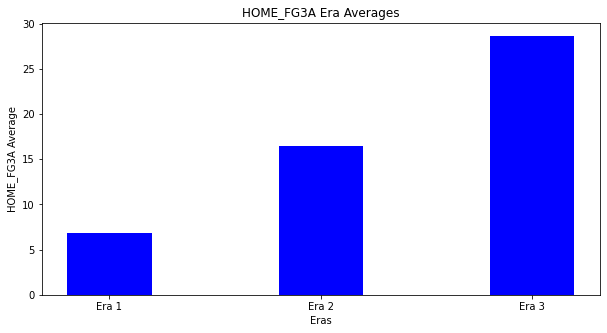

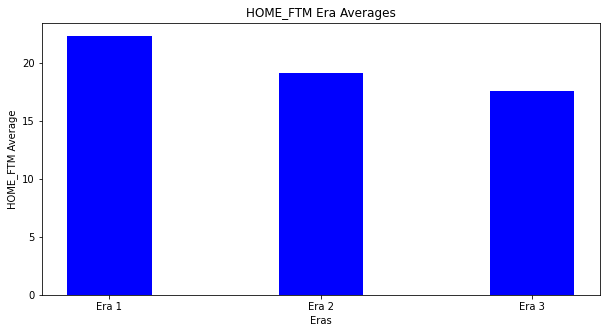

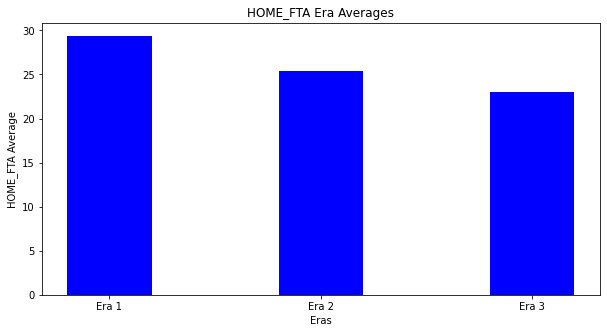

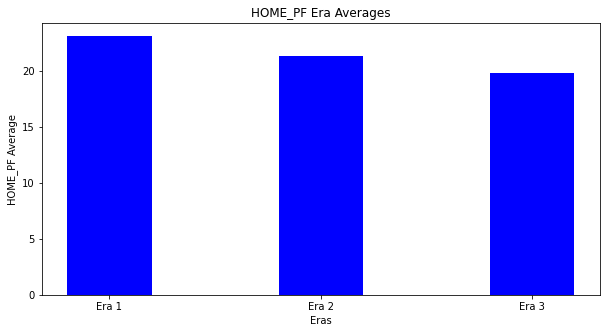

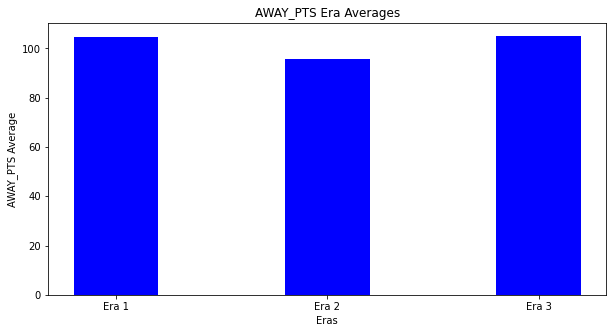

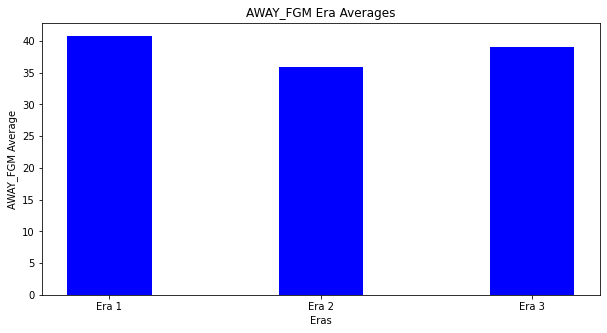

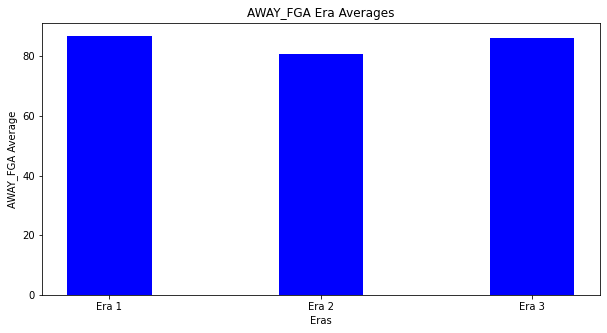

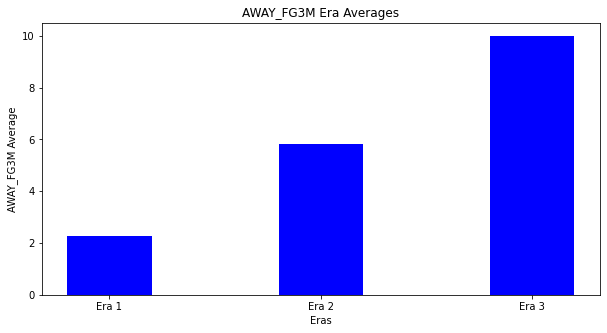

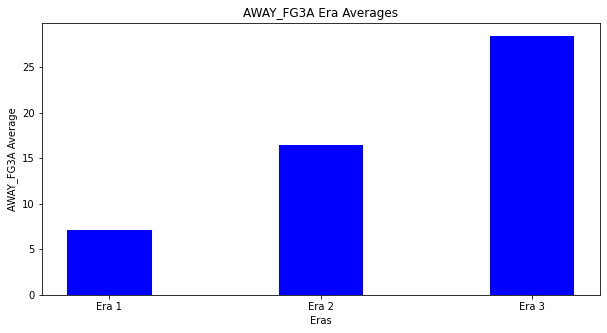

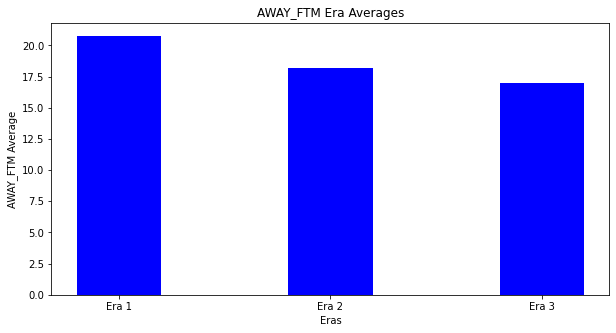

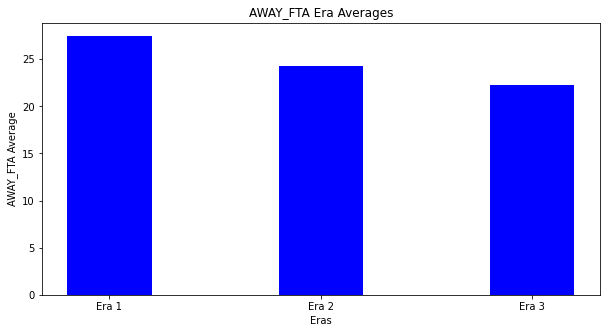

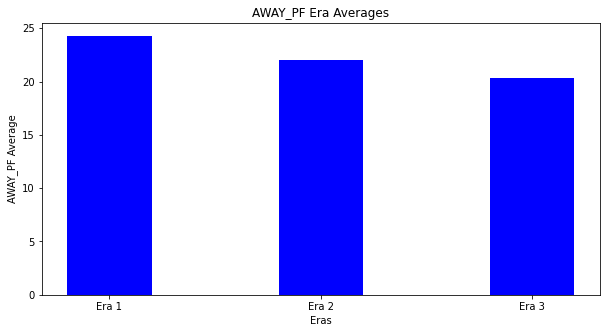

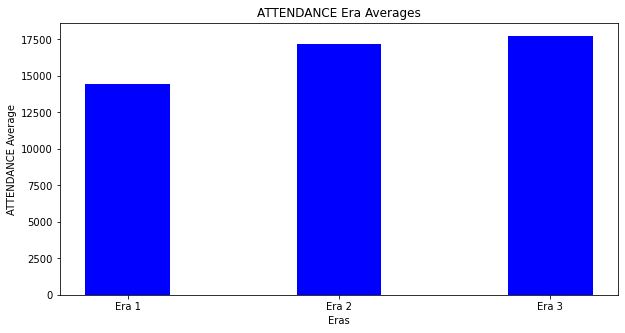

In [74]:
import matplotlib.pyplot as plt
for column in columns:
    fig = plt.figure(figsize = (10, 5))
    # creating the bar plot
    plt.bar(['Era 1', 'Era 2', 'Era 3'], erasDf[column], color ='blue', width = 0.4)
    plt.xlabel("Eras")
    plt.ylabel(f"{column} Average")
    plt.title(f"{column} Era Averages")
    plt.savefig(f"{column}_era_averages")
    plt.show()

In [5]:
# Attendance Features Response Splits
cumeGameAvgs = pd.read_csv('league_cum_game_avgs_current.csv')
cumeGameAvgs = cumeGameAvgs[(cumeGameAvgs['ATTENDANCE'] > 0) & ((cumeGameAvgs['HOME_TEAM_GAME_NUMBER'] > 1) & (cumeGameAvgs['AWAY_TEAM_GAME_NUMBER'] > 1))]

box_score_avgs = cumeGameAvgs.dropna()
box_score_avgs = box_score_avgs.reset_index(drop=True)
box_score_avgs = box_score_avgs.drop(columns=['HOME_TEAM_NAME', 'AWAY_TEAM_NAME', 'GAME_ID', 'SEASON_ID',
                                                  'DATE', 'HOME_AWAY_STREAK','AWAY_HOME_STREAK', 'Unnamed: 0',
                                                  'HOME_WL', 'AWAY_WL','HOME_TEAM_GAME_NUMBER', 'AWAY_TEAM_GAME_NUMBER', 'HOME_PTS', 'AWAY_PTS'])

features = box_score_avgs.drop(columns=['ATTENDANCE'])
response = box_score_avgs['ATTENDANCE']

X_train, X_test, y_train, y_test = train_test_split(features, response, test_size=0.20)

In [6]:
#Attendance
# KNN Train
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors = 100, weights='distance', n_jobs=-1)
knn.fit(X_train, y_train)
preds = knn.predict(X_train)

predictionDf = pd.DataFrame(preds, columns=['ATTENDANCE'])
predictionDf['Attendance Accuracy'] = preds / y_train 
predictionDf['Attendance Accuracy'].mean()

1.000000347189588

In [7]:
preds = knn.predict(X_test)

predictionDf = pd.DataFrame(preds, columns=['ATTENDANCE'])
predictionDf['Attendance Accuracy'] = preds / y_test 
predictionDf['Attendance Accuracy'].mean()

1.0914295353395318

In [8]:
# Random Forest Train
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

rfr = RandomForestRegressor(min_samples_split=10, max_depth=7, n_estimators=1000, n_jobs=-1)
rfr.fit(X_train, y_train)
preds = rfr.predict(X_train) 

predictionDf = pd.DataFrame(preds, columns=['ATTENDANCE'])
predictionDf['Attendance Accuracy'] = preds / y_train 
predictionDf['Attendance Accuracy'].mean()

1.0509192839860029

In [9]:
preds = rfr.predict(X_test) 

predictionDf = pd.DataFrame(preds, columns=['ATTENDANCE'])
predictionDf['Attendance Accuracy'] = preds / y_test 
predictionDf['Attendance Accuracy'].mean()

1.0814198901967906

In [10]:
# GradientBoostingRegressor Train
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(learning_rate=.1, max_depth=8, n_estimators=1000)
gbr.fit(X_train, y_train)
preds = gbr.predict(X_train)

predictionDf = pd.DataFrame(preds, columns=['ATTENDANCE'])
predictionDf['Attendance Accuracy'] = preds / y_train 
predictionDf['Attendance Accuracy'].mean()

1.002312103253694

In [11]:
preds = gbr.predict(X_test)

predictionDf = pd.DataFrame(preds, columns=['ATTENDANCE'])
predictionDf['Attendance Accuracy'] = preds / y_test 
predictionDf['Attendance Accuracy'].mean()

1.04668751491345

In [12]:
dump(gbr, 'nba-attendance-preds-gbr.joblib')

['nba-attendance-preds-gbr.joblib']

In [72]:
# Score Features Response Splits
cumeGameAvgs = pd.read_csv('league_cum_game_avgs_current.csv')
cumeGameAvgs = cumeGameAvgs[(cumeGameAvgs['HOME_TEAM_GAME_NUMBER'] > 1) & (cumeGameAvgs['AWAY_TEAM_GAME_NUMBER'] > 1)]

box_score_avgs = cumeGameAvgs.dropna()
box_score_avgs = box_score_avgs.reset_index(drop=True)
box_score_avgs = box_score_avgs.drop(columns=['HOME_TEAM_NAME', 'AWAY_TEAM_NAME', 'GAME_ID', 'SEASON_ID',
                                                  'DATE', 'HOME_AWAY_STREAK','AWAY_HOME_STREAK', 'Unnamed: 0',
                                                  'HOME_WL', 'AWAY_WL', 'ATTENDANCE','HOME_TEAM_GAME_NUMBER', 'AWAY_TEAM_GAME_NUMBER'])

features = box_score_avgs.drop(columns=['HOME_PTS', 'AWAY_PTS'])
response = box_score_avgs[['HOME_PTS', 'AWAY_PTS']]

X_train, X_test, y_train, y_test = train_test_split(features, response, test_size=0.20)

In [73]:
# Random Forest Scores Train
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

rfr = RandomForestRegressor(min_samples_split=10, max_depth=7, n_estimators=1000, n_jobs=-1)
rfr.fit(X_train, y_train)
preds = rfr.predict(X_train) 

predictionDf = pd.DataFrame(preds, columns=['HOME_PTS', 'AWAY_PTS'])
predictionDf['HOME_WL'] = [1 if row['HOME_PTS'] > row['AWAY_PTS'] else 0 for i, row in predictionDf.iterrows()]
trainWL = [1 if row['HOME_PTS'] > row['AWAY_PTS'] else 0 for i, row in y_train.iterrows()]

acc_score = accuracy_score(trainWL, predictionDf['HOME_WL']) 
acc_score

0.6718617343844754

In [78]:
# Random Forest Scores Test
preds = rfr.predict(X_test) 

predictionDf = pd.DataFrame(preds, columns=['HOME_PTS', 'AWAY_PTS'])
predictionDf['HOME_WL'] = [1 if row['HOME_PTS'] > row['AWAY_PTS'] else 0 for i, row in predictionDf.iterrows()]
trainWL = [1 if row['HOME_PTS'] > row['AWAY_PTS'] else 0 for i, row in y_test.iterrows()]

acc_score = accuracy_score(trainWL, predictionDf['HOME_WL']) 
acc_score

0.6578532443905397

In [74]:
# KNN Scores Train
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors = 100, weights='distance', n_jobs=-1)
knn.fit(X_train, y_train)
preds = knn.predict(X_train)

predictionDf = pd.DataFrame(preds, columns=['HOME_PTS', 'AWAY_PTS'])
predictionDf['HOME_WL'] = [1 if row['HOME_PTS'] > row['AWAY_PTS'] else 0 for i, row in predictionDf.iterrows()]
trainWL = [1 if row['HOME_PTS'] > row['AWAY_PTS'] else 0 for i, row in y_train.iterrows()]

acc_score = accuracy_score(trainWL, predictionDf['HOME_WL']) 
acc_score

1.0

In [79]:
# KNN Scores Test
preds = knn.predict(X_test)

predictionDf = pd.DataFrame(preds, columns=['HOME_PTS', 'AWAY_PTS'])
predictionDf['HOME_WL'] = [1 if row['HOME_PTS'] > row['AWAY_PTS'] else 0 for i, row in predictionDf.iterrows()]
trainWL = [1 if row['HOME_PTS'] > row['AWAY_PTS'] else 0 for i, row in y_test.iterrows()]

acc_score = accuracy_score(trainWL, predictionDf['HOME_WL']) 
acc_score

0.6429351121892056

In [75]:
# GradientBoostingRegressor Scores Train
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor

gbr = MultiOutputRegressor(GradientBoostingRegressor(min_samples_split = 2, max_depth=8, n_estimators=1000, learning_rate=.1), n_jobs=-1)
gbr.fit(X_train, y_train)
preds = gbr.predict(X_train)

predictionDf = pd.DataFrame(preds, columns=['HOME_PTS', 'AWAY_PTS'])
predictionDf['HOME_WL'] = [1 if row['HOME_PTS'] > row['AWAY_PTS'] else 0 for i, row in predictionDf.iterrows()]
trainWL = [1 if row['HOME_PTS'] > row['AWAY_PTS'] else 0 for i, row in y_train.iterrows()]

acc_score = accuracy_score(trainWL, predictionDf['HOME_WL']) 
acc_score

0.9796846573681018

In [80]:
# GradientBoostingRegressor Scores Test
preds = gbr.predict(X_test)

predictionDf = pd.DataFrame(preds, columns=['HOME_PTS', 'AWAY_PTS'])
predictionDf['HOME_WL'] = [1 if row['HOME_PTS'] > row['AWAY_PTS'] else 0 for i, row in predictionDf.iterrows()]
trainWL = [1 if row['HOME_PTS'] > row['AWAY_PTS'] else 0 for i, row in y_test.iterrows()]

acc_score = accuracy_score(trainWL, predictionDf['HOME_WL']) 
acc_score

0.6508186779866586

In [82]:
dump(knn, 'nba-preds-knn.joblib')
dump(gbr, 'nba-preds-gbr.joblib')
dump(rfr, 'nba-preds-rfr.joblib')

['nba-preds-rfr.joblib']

In [77]:
knnPreds = knn.predict(X_test)
gbrPreds = gbr.predict(X_test)
rfrPreds = rfr.predict(X_test)

preds = (knnPreds + gbrPreds + rfrPreds) / 3

predictionDf = pd.DataFrame(preds, columns=['HOME_PTS', 'AWAY_PTS'])
predictionDf['HOME_WL'] = [1 if row['HOME_PTS'] > row['AWAY_PTS'] else 0 for i, row in predictionDf.iterrows()]
trainWL = [1 if row['HOME_PTS'] > row['AWAY_PTS'] else 0 for i, row in y_test.iterrows()]

acc_score = accuracy_score(trainWL, predictionDf['HOME_WL']) 
acc_score

0.660157671315949